In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

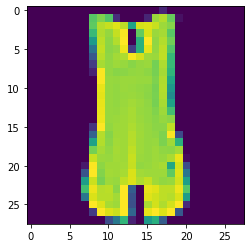

In [5]:
plt.imshow(X_train[4])

In [6]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train[:5]


array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [12]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (16,9))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

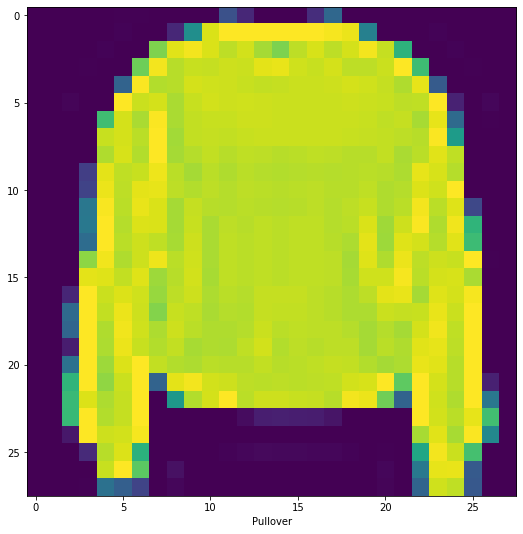

In [14]:
plot_sample(X_train, y_train, 7)


In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [18]:
cnn.fit(X_train,y_train, epochs=20)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4535 - accuracy: 0.8426
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3199 - accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2864 - accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2663 - accuracy: 0.9059
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2518 - accuracy: 0.9099
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2408 - accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2302 - accuracy: 0.9174
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2213 - accuracy: 0.9207
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2137 - accuracy: 0.9236
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2812 - accuracy: 0.9002


[0.2812286913394928, 0.9002000093460083]

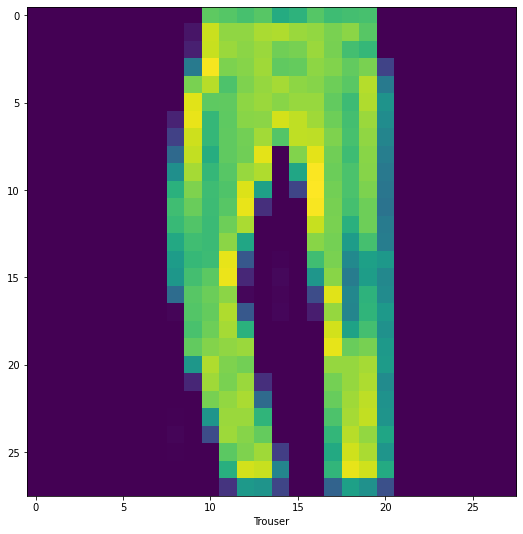

In [20]:
plot_sample(X_test,y_test,5)